In [1]:
import numpy as np
import matplotlib.pylab as plt

import os

from yolo_py import *
from PIL import Image
import time
from IPython.display import clear_output


In [2]:
ext = '_mouse'
yoloObj = YOLO(model_path = "../input/trained-weights/trained_weights_final_mouse.h5",
     classes_path = '../input/model-data/model_data/' + ext[1:] + '_classes.txt' ,
     anchors_path = '../input/model-data/model_data/yolo_anchors' + ext + '.txt',
    model_image_size = (64,256),
              gpu_num = 0,
              score = 0.3,
              iou = 0.4)


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

../input/trained-weights/trained_weights_final_mouse.h5 model, anchors, and classes loaded.


In [3]:
image_path = "../input/mouse-on-treadmill-frames/frames/right_right_039348_3_20cms_0degUP/frames/"
files = sorted(os.listdir(image_path), key = lambda x : int(x.split('.')[0]))
files_abs_path = [image_path+f for f in files ]


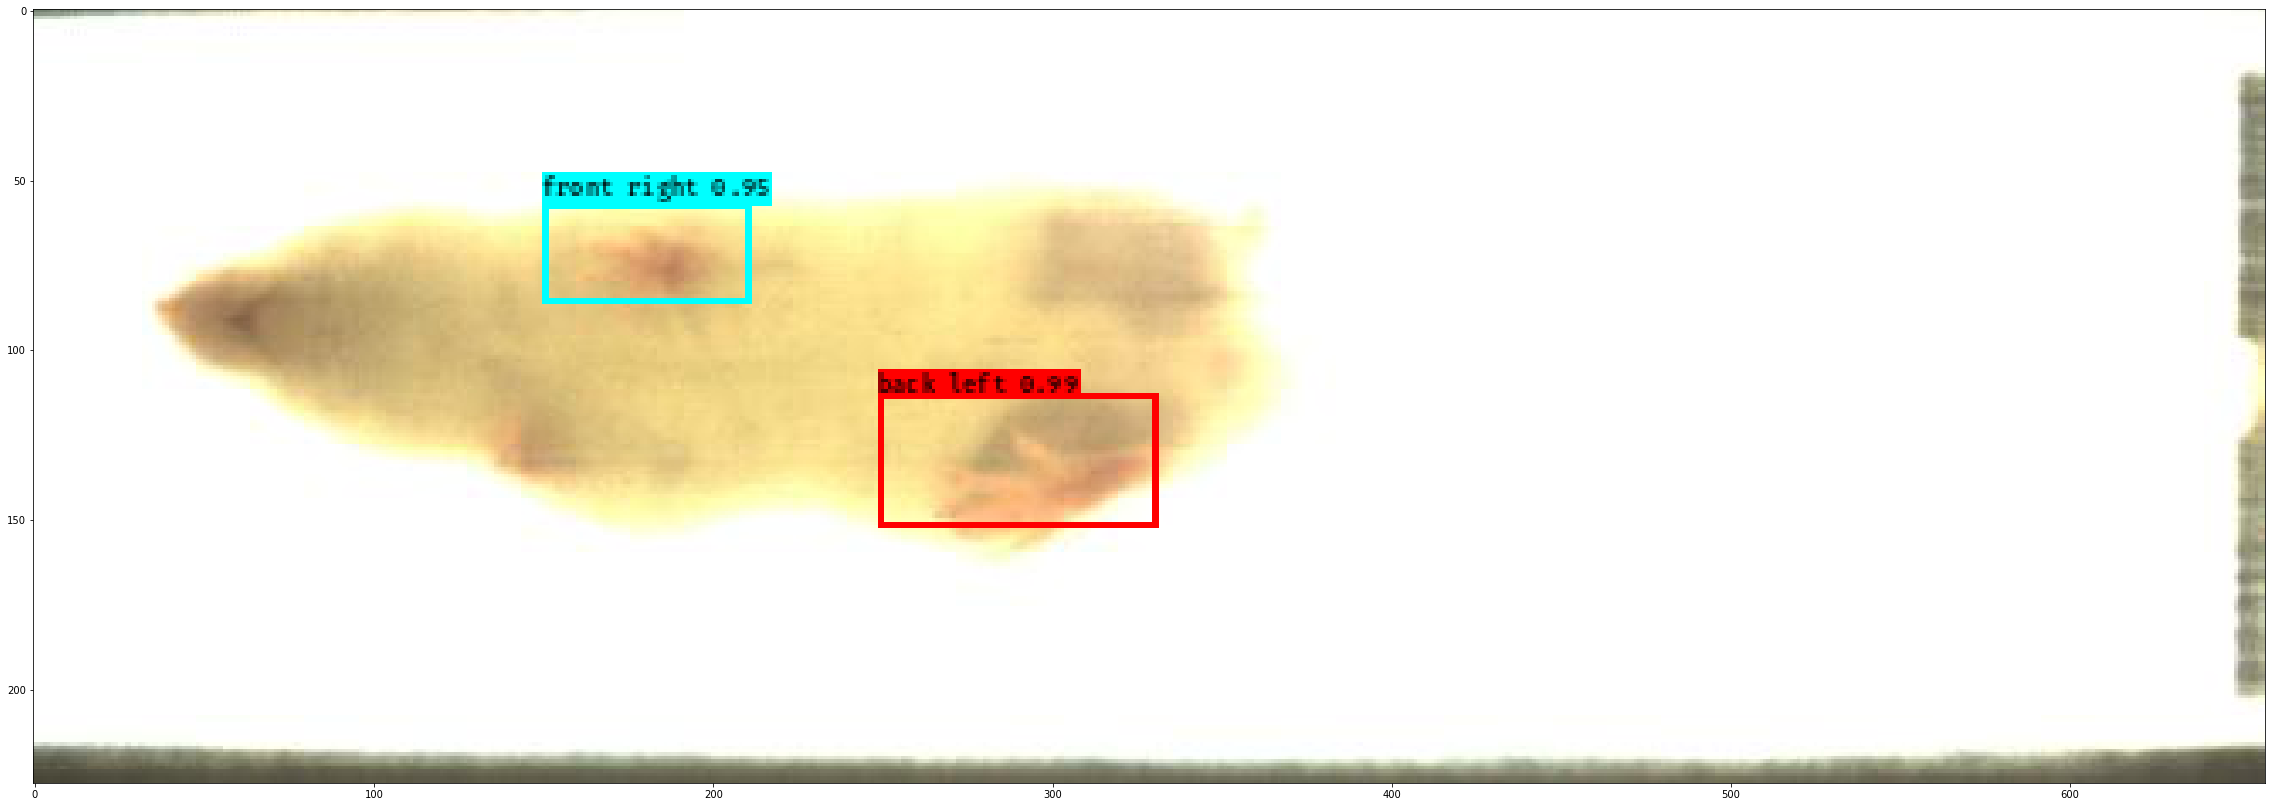

In [4]:
for f in files_abs_path:
    figure, ax = plt.subplots(1,figsize=(40,20))
    image = Image.open(f)
    image_data = np.array(image)
    image_ = Image.fromarray(image_data.astype('uint8'), 'RGB')
    i = yoloObj.detect_image(image_)
    ax.imshow(i)
    plt.show()
    time.sleep(0.01)
    clear_output(wait=True)